# Zeitdiskrete Systeme im Zeitbereich
In diesem Kapitel betrachten wir zunächst Systeme zur Verarbeitung von zeitdiskreten Sensorsignalen im Zeitbereich.

In [8]:
from __future__ import print_function, division
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
    
import matplotlib.pyplot as plt
%matplotlib inline
#from IPython.core.display import Image, display
import numpy as np
import scipy.signal as sig

import dsp_fpga_lib as dsp
dsp.versions() # print versions 
plt.rcParams.update(dsp.mpl_rc) # define plot properties 
#plt.rcParams.update({'axes.grid':False}) # 

Python version: 3.6.4
Numpy: 1.13.3
Scipy: 0.19.1
Matplotlib: 2.1.2 module://ipykernel.pylab.backend_inline


## Signale im Zeitbereich

In diesem Kapitel betrachten wir zunächst das System zur Verarbeitung von zeitdiskreten Sensorsignalen im Zeitbereich. Das folgende Bild zeigt ein Moving Average Filter mit der Ordnung $N=4$ und der Länge $L=5$.

![fig](img/ueb-LTI-MA.png)

Das folgende Bild zeigt ein kaskadiertes Filter, ebenfalls mit der Ordnung $N=4$ und der Länge $L=5$. Sind die Impulsantworten identisch?

![fig](img/ueb-LTI-kask_MA.png)


### Definition von Signal und Filter

In [9]:
# Define Signal and Filter
Ts = 1/200.0     # sampling period
fsig = 50.0      # signal frequency
phi0  = 0        # signal initial phase
tstep = 1e-3     # time step for "analog" signal
Tmax = 6.0/fsig  # timespan for 6 signal periods 
N_Ts = Tmax / Ts # number of samples in Tmax
# -- Calculate time-vectors and input signals ---
n = np.arange(0,round(N_Ts)) # sample n (start,stop,step)
t = np.arange(0,Tmax,tstep)  # time t
xn = 1.5 + 0.5*np.cos(2.0*np.pi*fsig*n*Ts + phi0) # x[n]
xt = 1.5 + 0.5*np.cos(2.0*np.pi*fsig*t + phi0) # x(t).

b = np.ones(4); a = 1 # MA-filter, N = 5
b = np.convolve([1,1,1],[1,1,1]); a = 1 
#b = [1, 0]; a = [1, -0.9] # lossy integrator

  n :    0 |    1 |    2 |    3 |    4 |    5 |    6 |    7 |
x[n]: 2.00 | 1.50 | 1.00 | 1.50 | 2.00 | 1.50 | 1.00 | 1.50 |

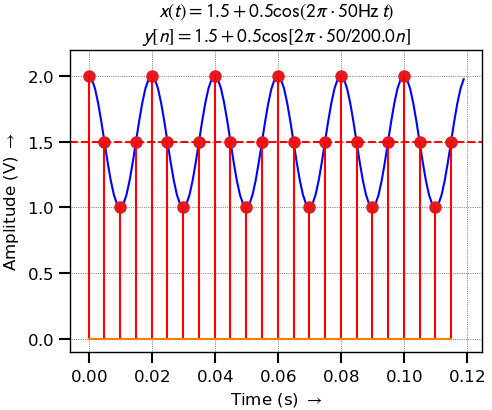

In [10]:
plt.figure() 
plt.xlabel(r'Time (s) $\rightarrow$')
plt.ylabel(r'Amplitude (V) $\rightarrow$')
plt.title('$x(t) = 1.5 + 0.5 \cos(2 \pi \cdot 50 \mathrm{Hz}\, t)$\n\
$y[n] = 1.5 + 0.5 \cos[2 \pi \cdot 50 / %.1f n]$'%(1./Ts))
#
plt.plot(t, xt, 'b-') # x(t) with blue line
plt.stem(n*Ts, xn, linefmt='r-') # x[n], red stems
plt.ylim(-0.1, 2.2)   # set y-limits to ymin, ymax
# horizontal line (relative x-coordinates):
plt.axhline(1.5, xmin=0, xmax=1, linestyle='--') 
plt.subplots_adjust(top=0.88,right=0.95)
print('  n :', end="")
for i in range(8): print('{:5d} |'.format(i), end="")
print('\nx[n]:', end="")
for i in range(8): print('{0:5.2f} |'.format(xn[i]), end="")

## Gefiltertes Signal im Zeitbereich

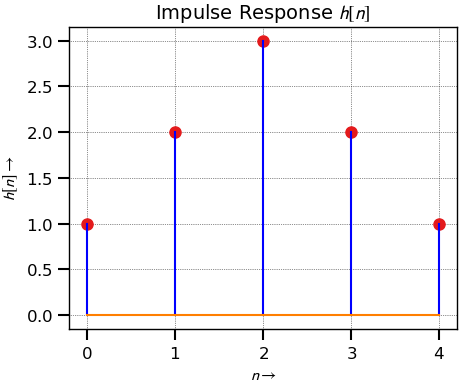

In [11]:
plt.figure()
h = b # Impulse response = coefficients for FIR filters
plt.stem(range(len(h)), h, 'b-') # plot h[n]
plt.xlabel(r'$n \rightarrow$'); plt.ylabel(r'$h[n] \rightarrow$');
plt.title(r'Impulse Response $h[n]$');

## Impulsantwort des Filters


y[n]: 0.50 1.38 2.50 3.00 3.25 3.38 3.50 3.38

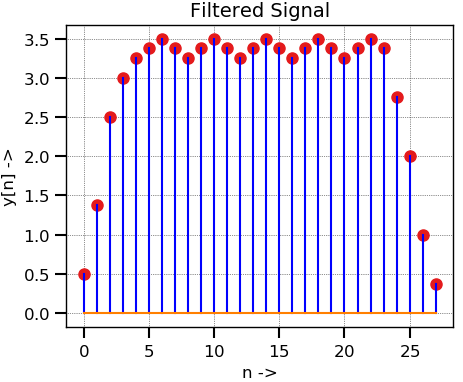

In [12]:
plt.figure()
yn = np.convolve(xn,h)/4. # convolve & scale
print('\ny[n]:', end="")
for i in range(8): print('{0:5.2f}'.format(yn[i]),
               end="")
plt.stem(range(len(yn)), yn, 'b') # y[n]
plt.xlabel('n ->'); plt.ylabel('y[n] ->')
plt.title('Filtered Signal');

**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.